In [1]:
%load_ext lab_black
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
# load mortality rate data

fl_pre_policy_mortality = pd.read_csv(
    "./fl_pre_policy_mortality.csv",
    sep=",",
)
fl_post_policy_mortality = pd.read_csv(
    "./fl_post_policy_mortality.csv",
    sep=",",
)
tx_pre_policy_mortality = pd.read_csv(
    "./tx_pre_policy_mortality.csv",
    sep=",",
)
tx_post_policy_mortality = pd.read_csv(
    "./tx_post_policy_mortality.csv",
    sep=",",
)
wa_pre_policy_mortality = pd.read_csv(
    "./wa_pre_policy_mortality.csv",
    sep=",",
)
wa_post_policy_mortality = pd.read_csv(
    "./wa_post_policy_mortality.csv",
    sep=",",
)

In [3]:
# concatenate pre and post mortality rate data

fl_mortality = pd.concat([fl_pre_policy_mortality, fl_post_policy_mortality])
tx_mortality = pd.concat([tx_pre_policy_mortality, tx_post_policy_mortality])
wa_mortality = pd.concat([wa_pre_policy_mortality, wa_post_policy_mortality])

In [4]:
# subset to dataframes with averaged mortality rate by year for each state

fl_mortality_avg = fl_mortality.groupby(["Year"], as_index=False)[
    "Mortality Rate"
].mean()
tx_mortality_avg = tx_mortality.groupby(["Year"], as_index=False)[
    "Mortality Rate"
].mean()
wa_mortality_avg = wa_mortality.groupby(["Year"], as_index=False)[
    "Mortality Rate"
].mean()

In [5]:
fl_mortality_avg

,Year,Mortality Rate
0,2003,0.000118
1,2004,0.000126
2,2005,0.000137
3,2006,0.000159
4,2007,0.000151
5,2008,0.000164
6,2009,0.000159
7,2010,0.000122
8,2011,0.000123
9,2012,0.000143


In [6]:
tx_mortality_avg

,Year,Mortality Rate
0,2003,0.000094
1,2004,0.000083
2,2005,0.000091
3,2006,0.000131
4,2007,0.000098
5,2008,0.000104
6,2009,0.000116
7,2010,0.000107
8,2011,0.000109
9,2012,0.000100


In [7]:
wa_mortality_avg

,Year,Mortality Rate
0,2003,0.000101
1,2004,0.000130
2,2005,0.000131
3,2006,0.000143
4,2007,0.000139
5,2008,0.000145
6,2009,0.000143
7,2010,0.000120
8,2011,0.000143
9,2012,0.000140


### Plot Pre-Post Policy for Florida, Texas, and Washington

#### Florida

In [8]:
# seperate to pre and post policy periods for FL

x_pre = np.array(fl_mortality_avg[fl_mortality_avg["Year"] < 2010]["Year"])
y_pre = np.array(fl_mortality_avg[fl_mortality_avg["Year"] < 2010]["Mortality Rate"])

x_post = np.array(fl_mortality_avg[fl_mortality_avg["Year"] >= 2010]["Year"])
y_post = np.array(fl_mortality_avg[fl_mortality_avg["Year"] >= 2010]["Mortality Rate"])

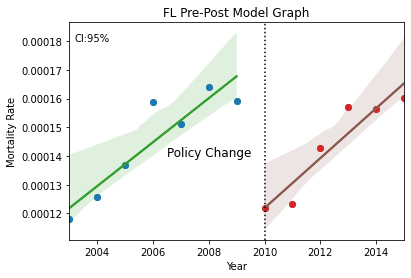

In [9]:
# plot the figure
import warnings

warnings.filterwarnings("ignore")

fig, ax = plt.subplots()

ax.plot(x_pre, y_pre, "o")
m, b = np.polyfit(x_pre, y_pre, 1)
plt.plot(x_pre, m * x_pre + b)
ax = sns.regplot(x_pre, y_pre, ci=95)

ax.plot(x_post, y_post, "o")
m, b = np.polyfit(x_post, y_post, 1)
plt.plot(x_post, m * x_post + b)
ax = sns.regplot(x_post, y_post, ci=95)

plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("FL Pre-Post Model Graph")
plt.axvline(x=2010, color="black", ls=":")
plt.text(2006.5, 0.00014, "Policy Change", fontsize=12)
plt.text(2003.2, 0.00018, "CI:95%", fontsize=10)

plt.show()

In [10]:
# import warnings

# warnings.filterwarnings("ignore")

# # regression result for pre policy period -- obtain standard error

# model_pre = sm.OLS(y_pre, x_pre)
# result_pre = model_pre.fit()
# print(result_pre.summary())

In [11]:
# import warnings

# warnings.filterwarnings("ignore")

# # regression result for post policy period -- obtain standard error

# model_post = sm.OLS(y_post, x_post)
# result_post = model_post.fit()
# print(result_post.summary())

#### Texas

In [12]:
# seperate to pre and post policy periods for TX

x_pre_tx = np.array(tx_mortality_avg[tx_mortality_avg["Year"] < 2007]["Year"])
y_pre_tx = np.array(tx_mortality_avg[tx_mortality_avg["Year"] < 2007]["Mortality Rate"])

x_post_tx = np.array(tx_mortality_avg[tx_mortality_avg["Year"] >= 2007]["Year"])
y_post_tx = np.array(
    tx_mortality_avg[tx_mortality_avg["Year"] >= 2007]["Mortality Rate"]
)

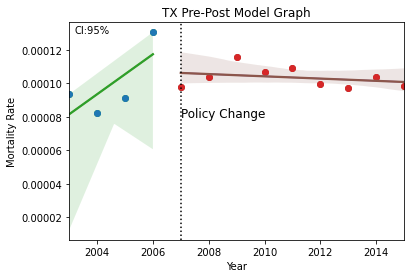

In [13]:
# plot the figure
import warnings

warnings.filterwarnings("ignore")

fig, ax = plt.subplots()

ax.plot(x_pre_tx, y_pre_tx, "o")
m, b = np.polyfit(x_pre_tx, y_pre_tx, 1)
plt.plot(x_pre_tx, m * x_pre_tx + b)
ax = sns.regplot(x_pre_tx, y_pre_tx, ci=95)

ax.plot(x_post_tx, y_post_tx, "o")
m, b = np.polyfit(x_post_tx, y_post_tx, 1)
plt.plot(x_post_tx, m * x_post_tx + b)
ax = sns.regplot(x_post_tx, y_post_tx, ci=95)

plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("TX Pre-Post Model Graph")
plt.axvline(x=2007, color="black", ls=":")
plt.text(2007, 0.00008, "Policy Change", fontsize=12)
plt.text(2003.2, 0.00013, "CI:95%", fontsize=10)

plt.show()

In [14]:
# import warnings

# warnings.filterwarnings("ignore")

# # regression result for pre policy period -- obtain standard error

# model_pre_tx = sm.OLS(y_pre_tx, x_pre_tx)
# result_pre_tx = model_pre_tx.fit()
# print(result_pre_tx.summary())

In [15]:
# import warnings

# warnings.filterwarnings("ignore")

# # regression result for post policy period -- obtain standard error

# model_post_tx = sm.OLS(y_post_tx, x_post_tx)
# result_post_tx = model_post_tx.fit()
# print(result_post_tx.summary())

#### Washington

In [16]:
# seperate to pre and post policy periods for WA

x_pre_wa = np.array(wa_mortality_avg[wa_mortality_avg["Year"] < 2012]["Year"])
y_pre_wa = np.array(wa_mortality_avg[wa_mortality_avg["Year"] < 2012]["Mortality Rate"])

x_post_wa = np.array(wa_mortality_avg[wa_mortality_avg["Year"] >= 2012]["Year"])
y_post_wa = np.array(
    wa_mortality_avg[wa_mortality_avg["Year"] >= 2012]["Mortality Rate"]
)

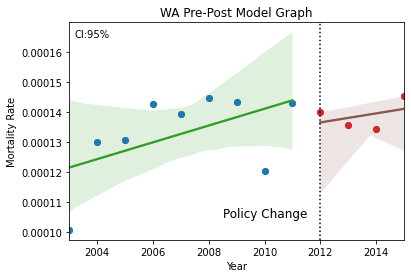

In [17]:
# plot the figure
import warnings

warnings.filterwarnings("ignore")

fig, ax = plt.subplots()

ax.plot(x_pre_wa, y_pre_wa, "o")
m, b = np.polyfit(x_pre_wa, y_pre_wa, 1)
plt.plot(x_pre_wa, m * x_pre_wa + b)
ax = sns.regplot(x_pre_wa, y_pre_wa, ci=95)

ax.plot(x_post_wa, y_post_wa, "o")
m, b = np.polyfit(x_post_wa, y_post_wa, 1)
plt.plot(x_post_wa, m * x_post_wa + b)
ax = sns.regplot(x_post_wa, y_post_wa, ci=95)

plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("WA Pre-Post Model Graph")
plt.axvline(x=2012, color="black", ls=":")
plt.text(2008.5, 0.000105, "Policy Change", fontsize=12)
plt.text(2003.2, 0.000165, "CI:95%", fontsize=10)

plt.show()

In [18]:
# import warnings

# warnings.filterwarnings("ignore")

# # regression result for pre policy period -- obtain standard error

# model_pre_wa = sm.OLS(y_pre_wa, x_pre_wa)
# result_pre_wa = model_pre_wa.fit()
# print(result_pre_wa.summary())

In [19]:
# import warnings

# warnings.filterwarnings("ignore")

# # regression result for post policy period -- obtain standard error

# model_post_wa = sm.OLS(y_post_wa, x_post_wa)
# result_post_wa = model_post_wa.fit()
# print(result_post_wa.summary())